In [ ]:
import numpy as np
import pandas as pd

In [ ]:
# Load the tables of dates and NDVI values
dates_df = pd.read_csv('output_dates.txt',header=None, sep='\s')
ndvi_df = pd.read_csv('output_NDVI.txt',header=None, sep='\s')
rainfall_df = pd.read_csv('output_rainfall.txt',header=None, sep='\s')
temp_df = pd.read_csv('output_temp.txt',header=None, sep='\s')

In [ ]:
# give each table the ID
dates_df = dates_df.rename_axis('Pixel_ID').reset_index()
ndvi_df = ndvi_df.rename_axis('Pixel_ID').reset_index()
rainfall_df = rainfall_df.rename_axis('Pixel_ID').reset_index()
temp_df = temp_df.rename_axis('Pixel_ID').reset_index()

In [ ]:
ndvi_df

In [ ]:
ndvi_stats = ndvi_df.describe()

# Print the statistics
print(ndvi_stats)

In [ ]:
# add variable name to the column
for i in range(1,31):
    dates_df = dates_df.rename(columns={dates_df.columns[i]: f"Date {i}"})
    ndvi_df = ndvi_df.rename(columns={ndvi_df.columns[i]: f"NDVI {i}"})
    rainfall_df = rainfall_df.rename(columns={rainfall_df.columns[i]: f"Rainfall {i}"})
    temp_df = temp_df.rename(columns={temp_df.columns[i]: f"Temperature {i}"})

In [ ]:
ndvi_df

In [ ]:
#Add timesteps column and sort by pixel_ID for each table

#NDVI
#add timesteps column
ndvi_df = pd.melt(ndvi_df, id_vars=['Pixel_ID'], var_name='Timestep', value_name='NDVI')
# Extract the timestep number from the 'Timestep' column
ndvi_df['Timestep'] = ndvi_df['Timestep'].str.extract('(\d+)', expand=False).astype(int)
# Sort by Pixel_ID and Timestep
ndvi_df = ndvi_df.sort_values(['Pixel_ID', 'Timestep']).reset_index(drop=True)

#Dates
#add timesteps column
dates_df = pd.melt(dates_df, id_vars=['Pixel_ID'], var_name='Timestep', value_name='Date')
# Extract the timestep number from the 'Timestep' column
dates_df['Timestep'] = dates_df['Timestep'].str.extract('(\d+)', expand=False).astype(int)
# Sort by Pixel_ID and Timestep
dates_df = dates_df.sort_values(['Pixel_ID', 'Timestep']).reset_index(drop=True)

#Rainfall
#add timesteps column
rainfall_df = pd.melt(rainfall_df, id_vars=['Pixel_ID'], var_name='Timestep', value_name='Rainfall')
# Extract the timestep number from the 'Timestep' column
rainfall_df['Timestep'] = rainfall_df['Timestep'].str.extract('(\d+)', expand=False).astype(int)
# Sort by Pixel_ID and Timestep
rainfall_df = rainfall_df.sort_values(['Pixel_ID', 'Timestep']).reset_index(drop=True)

#Temperature
#add timesteps column
temp_df = pd.melt(temp_df, id_vars=['Pixel_ID'], var_name='Timestep', value_name='Temperature')
# Extract the timestep number from the 'Timestep' column
temp_df['Timestep'] = temp_df['Timestep'].str.extract('(\d+)', expand=False).astype(int)
# Sort by Pixel_ID and Timestep
temp_df = temp_df.sort_values(['Pixel_ID', 'Timestep']).reset_index(drop=True)


In [ ]:
#Merge all veriable tables in one table
merged_table = pd.merge(pd.merge(pd.merge(dates_df, ndvi_df, on=['Pixel_ID', 'Timestep']), rainfall_df, on=['Pixel_ID', 'Timestep']), temp_df, on=['Pixel_ID', 'Timestep'])

merged_table

,Pixel_ID,Timestep,Date,NDVI,Rainfall,Temperature
0,0,1,2018-10-17,NaN,6.2,17.0
1,0,2,2018-10-22,0.258371,3.2,17.6
2,0,3,2018-10-27,0.265058,0.4,16.8
3,0,4,2018-11-01,0.384334,5.2,10.6
4,0,5,2018-11-06,NaN,4.0,13.6
...,...,...,...,...,...,...
714475,23815,26,2018-10-18,NaN,1.2,10.2
714476,23815,27,2018-10-23,NaN,2.4,4.0
714477,23815,28,2018-10-28,NaN,0.2,-1.6
714478,23815,29,2018-11-02,NaN,1.6,1.2


In [ ]:
merged_table.to_csv('merged_data.csv', index=False)

In [ ]:
data = pd.read_csv('merged_data.csv')

In [ ]:
data

,Unnamed: 0,Pixel_ID,Timestep,Date,NDVI,Rainfall,Temperature
0,0,0,1,2018-10-17,NaN,6.2,17.0
1,1,0,2,2018-10-22,0.258371,3.2,17.6
2,2,0,3,2018-10-27,0.265058,0.4,16.8
3,3,0,4,2018-11-01,0.384334,5.2,10.6
4,4,0,5,2018-11-06,NaN,4.0,13.6
...,...,...,...,...,...,...,...
714475,714475,23815,26,2018-10-18,NaN,1.2,10.2
714476,714476,23815,27,2018-10-23,NaN,2.4,4.0
714477,714477,23815,28,2018-10-28,NaN,0.2,-1.6
714478,714478,23815,29,2018-11-02,NaN,1.6,1.2


In [ ]:
# statitics of the datasets
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,714480.0,357239.500000,206252.754503,0.000000,178619.750000,357239.500000,535859.250000,714479.000000
Pixel_ID,714480.0,11907.500000,6875.091811,0.000000,5953.750000,11907.500000,17861.250000,23815.000000
Timestep,714480.0,15.500000,8.655448,1.000000,8.000000,15.500000,23.000000,30.000000
NDVI,416529.0,0.536628,0.239932,-0.996444,0.336419,0.560356,0.743093,0.999636
Rainfall,682470.0,1.393172,2.391656,0.000000,0.000000,0.200000,2.000000,65.400000
Temperature,698970.0,16.060864,6.060109,-13.400000,11.400000,16.200000,20.800000,33.000000


In [ ]:
# Count the number of missing values in the NDVI column
ndvi_missing = data['Temperature'].isna().sum()
ndvi_missing

15510

In [ ]:
# view the data in timeseries (optional)
date_time = pd.to_datetime(data.pop('Date'), format='%Y.%m.%d')

plot_cols = ['NDVI', 'Rainfall', 'Temperature']
plot_features = data[plot_cols]
plot_features.index = date_time
_ = plot_features.plot(subplots=True)

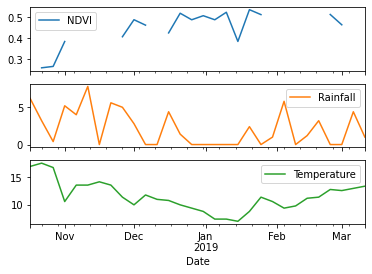

In [ ]:
# view the data in timeseries of the first pixel (optional)
date_time = pd.to_datetime(data.pop('Date'), format='%Y.%m.%d')

plot_cols = ['NDVI', 'Rainfall', 'Temperature']
plot_features = data[plot_cols]
plot_features.index = date_time
_ = plot_features.iloc[:30].plot(subplots=True)

In [ ]:
data

,Unnamed: 0,Pixel_ID,Timestep,Date,NDVI,Rainfall,Temperature
0,0,0,1,2018-10-17,NaN,6.2,17.0
1,1,0,2,2018-10-22,0.258371,3.2,17.6
2,2,0,3,2018-10-27,0.265058,0.4,16.8
3,3,0,4,2018-11-01,0.384334,5.2,10.6
4,4,0,5,2018-11-06,NaN,4.0,13.6
...,...,...,...,...,...,...,...
714475,714475,23815,26,2018-10-18,NaN,1.2,10.2
714476,714476,23815,27,2018-10-23,NaN,2.4,4.0
714477,714477,23815,28,2018-10-28,NaN,0.2,-1.6
714478,714478,23815,29,2018-11-02,NaN,1.6,1.2


In [ ]:
missing_ndvi_counts = data.groupby('Pixel_ID')['NDVI'].apply(lambda x: x.isna().sum()).reset_index(name='Missing_NDVI_Count')
missing_ndvi_counts

In [ ]:
missing_ndvi_counts['Missing_NDVI_Percentage'] = (missing_ndvi_counts['Missing_NDVI_Count'] / 30) * 100
pixels_with_over_30_percent_missing = missing_ndvi_counts[missing_ndvi_counts['Missing_NDVI_Percentage'] > 50].shape[0]
print(f"Number of pixels with more than 30% missing NDVI values: {pixels_with_over_30_percent_missing}")

Number of pixels with more than 30% missing NDVI values: 6359


In [ ]:
pixels_to_remove = missing_ndvi_counts[missing_ndvi_counts['Missing_NDVI_Percentage'] > 30]['Pixel_ID'].tolist()
data = data[~data['Pixel_ID'].isin(pixels_to_remove)]

In [ ]:
data

,Unnamed: 0,Pixel_ID,Timestep,Date,NDVI,Rainfall,Temperature
0,0,0,1,2018-10-17,NaN,6.2,17.0
1,1,0,2,2018-10-22,0.258371,3.2,17.6
2,2,0,3,2018-10-27,0.265058,0.4,16.8
3,3,0,4,2018-11-01,0.384334,5.2,10.6
4,4,0,5,2018-11-06,NaN,4.0,13.6
...,...,...,...,...,...,...,...
714235,714235,23807,26,2018-10-08,NaN,1.4,2.6
714236,714236,23807,27,2018-10-13,NaN,0.6,9.6
714237,714237,23807,28,2018-10-18,NaN,0.4,10.0
714238,714238,23807,29,2018-10-23,0.774192,1.2,4.0


In [ ]:
# statitics of the datasets
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,202800.0,334268.153846,209779.079972,0.000000,155969.75000,260669.500000,506744.250000,714239.000000
Pixel_ID,202800.0,11141.788462,6992.635993,0.000000,5198.75000,8688.500000,16890.750000,23807.000000
Timestep,202800.0,15.500000,8.655463,1.000000,8.00000,15.500000,23.000000,30.000000
NDVI,156625.0,0.475192,0.228751,-0.990237,0.28081,0.460674,0.663455,0.999544
Rainfall,192240.0,0.956271,1.940840,0.000000,0.00000,0.000000,1.200000,61.000000
Temperature,196830.0,19.059367,6.036488,-10.200000,14.40000,20.000000,24.000000,33.000000


In [ ]:
#deal with missing data for NDVI
# #seasonal mean imputation
# data['Date'] = pd.to_datetime(data['Date'])
# data['Month'] = data['Date'].dt.month
# ndvi_means = data.groupby('Month')['NDVI'].mean().reset_index()
# data = pd.merge(data, ndvi_means, on='Month', how='left', suffixes=('', '_mean'))
# #Fill in the missing NDVI values with the corresponding monthly mean values.
# data['NDVI'] = data['NDVI'].fillna(data['NDVI_mean'])
# data.drop('NDVI_mean', axis=1, inplace=True)
# data.drop(columns=['Month'])

In [ ]:
# Get statistics for the NDVI column
ndvi_stats = data['NDVI'].describe()

# Print the statistics
print(ndvi_stats)

count    202800.000000
mean          0.476658
std           0.201517
min          -0.990237
25%           0.330344
50%           0.465179
75%           0.603387
max           0.999544
Name: NDVI, dtype: float64


In [ ]:
# Fill missing data for tem, rainfall and NDVI
data['Temperature'] = data['Temperature'].interpolate(method='pchip')
data['Rainfall'] = data['Rainfall'].interpolate(method='pchip')
data['NDVI'] = data['NDVI'].interpolate(method='pchip')

# Fill remaining missing values
data['NDVI'] = data['NDVI'].fillna(method='bfill')


In [ ]:
has_nan = data.isna().any().any()
print("NaN values in the DataFrame:", has_nan)


NaN values in the DataFrame: False


In [ ]:
# statitics of the datasets after fill the missing data
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,202800.0,334268.153846,209779.079972,0.000000,155969.75000,260669.500000,506744.250000,714239.000000
Pixel_ID,202800.0,11141.788462,6992.635993,0.000000,5198.75000,8688.500000,16890.750000,23807.000000
Timestep,202800.0,15.500000,8.655463,1.000000,8.00000,15.500000,23.000000,30.000000
NDVI,202800.0,0.481913,0.226883,-0.990237,0.28943,0.472532,0.668168,0.999544
Rainfall,202800.0,0.969940,1.936655,0.000000,0.00000,0.000000,1.200000,61.000000
Temperature,202800.0,18.816846,6.144351,-10.200000,13.80000,19.800000,23.800000,33.000000


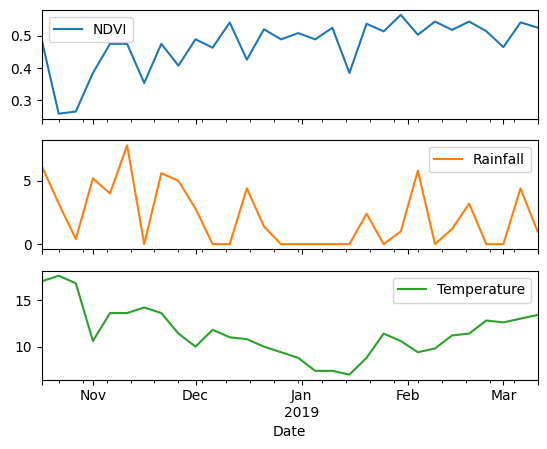

In [ ]:
# view the data in timeseries of the first pixel after fill the missing data(optional)
date_time = pd.to_datetime(data.pop('Date'), format='%Y.%m.%d')

plot_cols = ['NDVI', 'Rainfall', 'Temperature']
plot_features = data[plot_cols]
plot_features.index = date_time
_ = plot_features.iloc[:30].plot(subplots=True)

In [ ]:
data

,Unnamed: 0,Pixel_ID,Timestep,Date,NDVI,Rainfall,Temperature
0,0,0,1,2018-10-17,0.258371,6.2,17.0
1,1,0,2,2018-10-22,0.258371,3.2,17.6
2,2,0,3,2018-10-27,0.265058,0.4,16.8
3,3,0,4,2018-11-01,0.384334,5.2,10.6
4,4,0,5,2018-11-06,0.376317,4.0,13.6
...,...,...,...,...,...,...,...
714235,714235,23807,26,2018-10-08,0.639712,1.4,2.6
714236,714236,23807,27,2018-10-13,0.714394,0.6,9.6
714237,714237,23807,28,2018-10-18,0.759236,0.4,10.0
714238,714238,23807,29,2018-10-23,0.774192,1.2,4.0


In [ ]:
data.to_csv('data.csv', index=False)